In [17]:
import os
from matplotlib import pyplot as plt
from pylab import rcParams
import matplotlib.gridspec as gridspec
import seaborn as sns
from collections import defaultdict
import pandas as pd
sns.set(style='ticks', palette='Set2')
dt = 0.001

def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError("smooth only accepts 1 dimension arrays.")
        if x.size < window_len:
                raise ValueError("Input vector needs to be bigger than window size.")
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
        s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=numpy.ones(window_len,'d')
        else:  
                w=eval('numpy.'+window+'(window_len)')
        y=numpy.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

rcParams['figure.figsize'] = 17, 8
orig_values = {x: v for x, v in rcParams.items() if 'size' in x}
rcParams.update({'font.size': 12, 
                 'legend.fontsize': 16, 
                 'axes.titlesize': 16,
                 'axes.labelsize': 16,
                 'xtick.labelsize': 12, 
                 'ytick.labelsize': 12,
                 })
res2color = {
    0.00001: 0,
    0.00002: 1,
    0.00003: 2,
    0.00004: 3,
    0.00005: 4,
    0.00006: 19,
    0.00008: 5,
    0.00009: 15,
    0.0001: 6,
    0.0002: 7,
    0.0003: 8,
    0.0004: 9,
    0.0005: 10,
    0.0007: 17,
    0.0008: 11,
    0.0009: 16,
    0.001: 12,
    0.002: 14,
    'aa': 13
    }

plot_colors = np.array([
    (197,27,125),
    (31, 120, 180),
    (178, 223, 138),
    (51, 160, 44),
    (251, 154, 153),
    (227, 26, 28),  # 5
    (253, 191, 111),
    (255, 127, 0),
    (202, 178, 214),
    (106, 61, 154),
    (166,86,40), # 10
    (177, 89, 40), ## color palet 
    (57, 106, 177), 
    (118,42,131), # 13
    (104, 37, 41), 
    (83, 81, 84), 
    (107, 76, 154),
    (146, 36, 40),
    (148, 139, 61),
    (137, 61, 57),
    ]) / 255.0
fonttitle=16
fontother=12
%matplotlib inline

In [11]:
bck_energy_file = np.loadtxt('sim0_0.00001_energy_1e-05_22516_first.csv', skiprows=1)
res_cols = {v: x for x, v in enumerate(open('sim0_0.00001_energy_1e-05_22516_first.csv', 'r').readline().split())}

In [12]:
sorted(res_cols.items(), key=lambda x: x[1])
res_cols['Epot'] = range(7, 79)
res_cols['bonds'] = range(49, 60)
res_cols['LJ'] = [71, 78]
res_cols['angles'] = range(7, 49)
res_cols['dihedrals'] = range(61, 71)

In [13]:
ref_energy_file = np.loadtxt('sim0_energy_0.0_71700.csv', skiprows=1)

In [14]:
ref_cols = {v: x for x, v in enumerate(open('sim0_energy_0.0_71700.csv', 'r').readline().split())}
ref_cols['Epot'] = range(4, 70)
ref_cols['LJ'] = [64]

In [15]:
RT = 8.314 * 298.0 * 10**-3
NRT = RT*500*27.0
NRT2 = RT*1000*27.0

# Potential energy

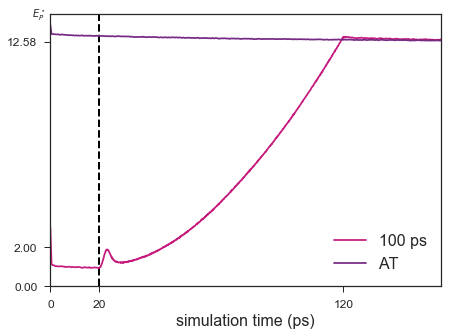

In [24]:
rcParams['figure.figsize'] = 7, 5
plt.annotate(r'$E_P^\star$',  xy=(-0.01, 0.99),  xycoords='axes fraction', horizontalalignment='right')

plt.axvline(x=20.0, linewidth=2, linestyle='--', color='k')
plt.plot(bck_energy_file[:, res_cols['time']], (np.sum(bck_energy_file[:, res_cols['Epot']], axis=1))/NRT,
         color=plot_colors[res2color[0.00001]], label='100 ps')
plt.plot(ref_energy_file[:, ref_cols['time']], np.sum(ref_energy_file[:, ref_cols['Epot']], axis=1)/NRT2,
         color=plot_colors[res2color['aa']], label='AT')
plt.xlabel('simulation time (ps)')
plt.yticks([0, 2, np.min(np.sum(ref_energy_file[:, ref_cols['Epot']], axis=1)/NRT2)])
plt.xticks([0, 20, 120])
plt.ylim([0., 14])
plt.xlim([0, 160])
plt.legend(loc=0)
plt.savefig('melf_energy.pdf', dpi=300, bbox_inches='tight')
plt.savefig('melf_energy.png', dpi=300, bbox_inches='tight')

## The average value of Ep

In [25]:
avg_ref_epot = np.average(np.sum(ref_energy_file[:, ref_cols['Epot']], axis=1))/NRT2
std_ref_epot = np.std(np.sum(ref_energy_file[:, ref_cols['Epot']], axis=1)/NRT2)
print avg_ref_epot, std_ref_epot
avg_res_epot = np.average(np.sum(bck_energy_file[:, res_cols['Epot']], axis=1)[1012:])/NRT
std_res_epot = np.std(np.sum(bck_energy_file[:, res_cols['Epot']], axis=1)[1012:]/NRT)
print avg_res_epot, std_res_epot

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(avg_ref_epot, std_ref_epot)? (<ipython-input-25-ae1fbc4013eb>, line 3)

### Structural data

In [26]:
struct_files = {}
for f in os.listdir('struct'):
    try:
        struct_files[f] = np.loadtxt(os.path.join('struct/', f), usecols=(0, 1), comments=('#', '@'))
    except Exception as ex:
        print('problem with', f, ex)

In [27]:
struct_files.keys()

dict_keys(['ref_C_N.xvg', 'res_C_C.xvg', 'res_C_N.xvg', 'res_O_H.xvg', 'ref_O_H.xvg', 'ref_C_C.xvg'])

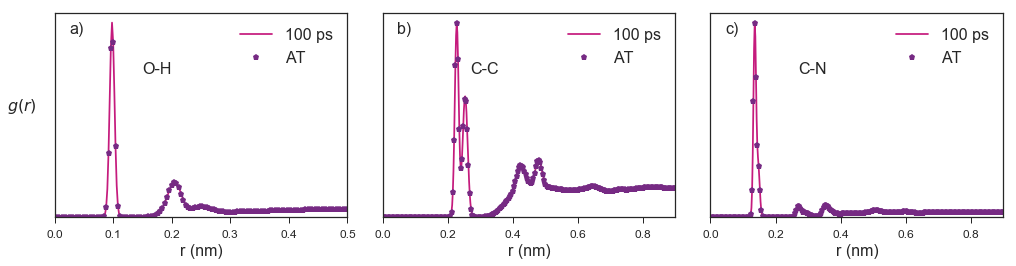

In [29]:
# Structural data
rcParams['figure.figsize'] = [17, 5]
rcParams['figure.figsize'][1] = rcParams['figure.figsize'][1]*3/4
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(1, 3)
gs1.update(wspace=0.12, hspace=0.3)
ax1 = fig.add_subplot(gs1[0, 0]) # rdf O-H
ax2 = fig.add_subplot(gs1[0, 1]) # rdf C-C
ax3 = fig.add_subplot(gs1[0, 2]) # rdf C-N

an_11 = ax1.annotate('a)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
an_1 = ax1.annotate(r'$g(r)$', xy=(-0.06, 0.52),  
                    xycoords='axes fraction', 
                    fontsize=fonttitle, 
                    horizontalalignment='right')
ax1.plot(struct_files['res_O_H.xvg'][:, 0], 
         struct_files['res_O_H.xvg'][:, 1], 
         color=plot_colors[res2color[0.00001]], label='100 ps')
ax1.plot(struct_files['ref_O_H.xvg'][:, 0], 
         struct_files['ref_O_H.xvg'][:, 1], 
         'p', color=plot_colors[res2color['aa']], markevery=2, label='AT')
ax1.set_xlim([0, 0.5])
ax1.set_ylim(ymin=0)
ax1.set_yticks([])
ax1.annotate('O-H', xy=(0.3, 0.7), xycoords='axes fraction', fontsize=fonttitle)
ax1.legend(loc=0)
ax1.set_xlabel('r (nm)')

an_22 = ax2.annotate('b)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
ax2.plot(struct_files['res_C_C.xvg'][:, 0], 
         struct_files['res_C_C.xvg'][:, 1], 
         color=plot_colors[res2color[0.00001]], label='100 ps')
ax2.plot(struct_files['ref_C_C.xvg'][:, 0], 
         struct_files['ref_C_C.xvg'][:, 1], 
         'p', color=plot_colors[res2color['aa']], markevery=2, label='AT')
ax2.set_xlim([0, 0.9])
ax2.set_ylim(ymin=0)
ax2.set_yticks([])
ax2.annotate('C-C', xy=(0.3, 0.7), xycoords='axes fraction', fontsize=fonttitle)
ax2.legend(loc=0)
ax2.set_xlabel('r (nm)')

an_33 = ax3.annotate('c)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
ax3.plot(struct_files['res_C_N.xvg'][:, 0], 
         struct_files['res_C_N.xvg'][:, 1], 
         color=plot_colors[res2color[0.00001]], label='100 ps')
ax3.plot(struct_files['ref_C_N.xvg'][:, 0], 
         struct_files['ref_C_N.xvg'][:, 1], 
         'p', color=plot_colors[res2color['aa']], markevery=2, label='AT')
ax3.set_xlim([0, 0.9])
ax3.set_ylim(ymin=0)
ax3.set_yticks([])
ax3.annotate('C-N', xy=(0.3, 0.7), xycoords='axes fraction', fontsize=fonttitle)
ax3.legend(loc=0)
ax3.set_xlabel('r (nm)')

#lgd = plt.legend(bbox_to_anchor=(-0.5, -0.35), ncol=2, loc='lower center', frameon=False)
plt.savefig('melf_structure.pdf', dpi=300, bbox_extra_artists=[an_1], bbox_inches='tight')
plt.savefig('melf_structure.png', dpi=300, bbox_extra_artists=[an_1], bbox_inches='tight')

# Dynamic data

In [31]:
dynamic_data = {}
for f in os.listdir('dynamic'):
    try:
        dynamic_data[f] = np.loadtxt(os.path.join('dynamic/', f), comments=('#', '@'))
    except Exception as ex:
        print('problem with', f, ex)


In [32]:
dynamic_data.keys()

dict_keys(['ref_hbnum.xvg', 'res_msd.xvg', 'ref_msd.xvg', 'res_hbnum.xvg'])

## ACF and H-Bonds

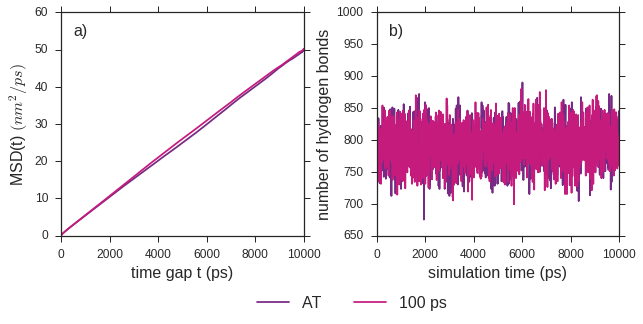

In [25]:
rcParams['figure.figsize'] = 10, 4
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.3, hspace=0.0)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])

## Plot MSD
an_1 = ax1.annotate(r'a)', xy=(0.05, 0.9),  xycoords='axes fraction', fontsize=fonttitle)
ax1.plot(dynamic_data['ref_msd.xvg'][:, 0],
         dynamic_data['ref_msd.xvg'][:, 1], 
         label='AT', color=plot_colors[res2color['aa']])
ax1.plot(dynamic_data['res_msd.xvg'][:, 0],
         dynamic_data['res_msd.xvg'][:, 1], 
         label='100 ps', color=plot_colors[res2color[0.00001]])
# ax1.annotate(r'$D^{AT} = 0.8241 \pm 0.03 \; nm^2/ns$', xy=(0.1, 0.8), 
#              xycoords='axes fraction', fontsize=fonttitle,
#             color=plot_colors[res2color['aa']])
# ax1.annotate(r'$D^{100ps} = 0.8348 \pm \; 0.04 \; nm^2/ns$', xy=(0.1, 0.71), 
#              xycoords='axes fraction', fontsize=fonttitle,
#             color=plot_colors[res2color[0.00001]])
ax1.set_xlim([0, 10000])
ax1.set_xlabel(r'time gap t (ps)')
ax1.set_ylabel(r'MSD(t) $(nm^2 / ps)$')

## Plot HBonds
an_2 = ax2.annotate(r'b)', xy=(0.05, 0.9),  xycoords='axes fraction', fontsize=fonttitle)
ax2.plot(dynamic_data['ref_hbnum.xvg'][:, 0],
         dynamic_data['ref_hbnum.xvg'][:, 1], 
         label='AT', color=plot_colors[res2color['aa']])
ax2.plot(dynamic_data['res_hbnum.xvg'][:, 0],
         dynamic_data['res_hbnum.xvg'][:, 1], 
         label='100 ps', color=plot_colors[res2color[0.00001]])
# ax2.annotate(r'$\langle H_{bonds} \rangle^{AT} = 791 \pm 27$', 
#              xy=(0.1, 0.8), xycoords='axes fraction', fontsize=fonttitle,
#             color=plot_colors[res2color['aa']])
# ax2.annotate(r'$\langle H_{bonds} \rangle^{100 ps} = 792 \pm 28$', 
#              xy=(0.1, 0.71), xycoords='axes fraction', fontsize=fonttitle,
#             color=plot_colors[res2color[0.00001]])
ax2.set_xlabel(r'simulation time (ps)')
ax2.set_ylim([650, 1000])
ax2.set_ylabel('number of hydrogen bonds')

lgd = ax2.legend(bbox_to_anchor=(-0.1, -0.4), ncol=5, loc='lower center', frameon=False)
plt.savefig('melf_dynamical.pdf', dpi=300, bbox_extra_artists=[lgd, an_1, an_2], bbox_inches='tight')
plt.savefig('melf_dynamical.png', dpi=300, bbox_extra_artists=[lgd, an_1, an_2], bbox_inches='tight')